## Imersão com a Alura

Nesse notbook está todo o meu estudo de Python e Pandas, que fiz seguindo (ou não) às aulas de Imersão de Dados da Alura.

- Primeiro importamos as bibliotecas usadas na aula.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Criamos as váriaveis chamando os arquivos das planilhas usadas nas aulas do Google Sheets.

In [2]:
dados = pd.read_csv('/content/Cópia de Dados_Imersão - dados.csv')
avaliacoes = pd.read_csv('/content/Cópia de Dados_Imersão - avaliações.csv')

- Checamos se está tudo certo e vimos o que está dentro das nossa váriavel.

In [3]:
dados.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category         category_geral  \
0  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
1  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
2  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
3  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
4  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   

              subcategoria actual_price product_price percent  \
0  Accessories&Peripherals      ₹399,00     ₹1.099,00  63,69%   
1  Accessories&Peripherals      ₹199,00       ₹349,00  42,98%   
2  Accessories&Peripherals      ₹199,00     ₹1.899,00  89,52%   
3  Accessories&Peripherals      ₹329,00       ₹699,00  52,93%   
4  Accessories&Peripherals      ₹154,00       ₹399,00  61,40%   

  actual_price_real rating  rating_count  \
0           R$23,94    4,5         24269   
1           R$11,94      4         43994   
2           R$11,94   4,52          7928   
3           R$19,74    4,5         94363   
4            R$9,24    4,5         16905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                        product_link  \
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...   
1  https://www.amazon.in/Ambrane-Unbreakable-Char...   
2  https://www.amazon.in/Sounce-iPhone-Charging-C...   
3  https://www.amazon.in/Deuce-300-Resistant-Tang...   
4  https://www.amazon.in/Portronics-Konnect-POR-1...   

                                              titulo  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                              review  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                         titulo_ptbr  \
0  Satisfeito, o carregamento é realmente rápido,...   
1  Um bom cabo trançado para o seu dispositivo ti...   
2  Boa velocidade para versões anteriores, Bom pr...   
3  Bom produto, Bom, Bom, Produto realmente bom, ...   
4  Tão bom quanto o original, bom, bom para uso s...   

                                         review_ptbr  \
0  Parece durável. A carga também está boa. Não h...   
1  Eu pedi este cabo para conectar o meu telefone...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                              resumo sentimentos  
0  Cabo de carga durável e de boa qualidade, com ...    positivo  
1                                                NaN         NaN  
2                                                NaN         NaN  
3                                                NaN         NaN  
4                                                NaN         NaN

- Vários dados estão sendo lidos como "objetos" e precisamos arrumar isso.

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_id         1465 non-null   object
 1   product_name       1465 non-null   object
 2   category           1465 non-null   object
 3   category_geral     1465 non-null   object
 4   subcategoria       1465 non-null   object
 5   actual_price       1465 non-null   object
 6   product_price      1465 non-null   object
 7   percent            1465 non-null   object
 8   actual_price_real  1465 non-null   object
 9   rating             1465 non-null   object
 10  rating_count       1465 non-null   int64 
 11  about_product      1465 non-null   object
 12  product_link       1465 non-null   object
 13  titulo             1465 non-null   object
 14  review             1465 non-null   object
 15  titulo_ptbr        1465 non-null   object
 16  review_ptbr        2 non-null      object


In [5]:
dados.describe()

rating_count
count  1.465000e+03
mean   2.166947e+04
std    9.132905e+04
min    0.000000e+00
25%    9.100000e+02
50%    4.003000e+03
75%    1.466700e+04
max    2.051952e+06

- Os dados estavam em rupia indiana, vamos trocar a rupia para ficarem mais legiveis.

In [6]:
dados['actual_price'] = dados['actual_price'].str.replace('₹', '')


In [7]:
dados['actual_price'] = dados['actual_price'].str.replace('.', '')

<ipython-input-7-37c001c2b248>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['actual_price'] = dados['actual_price'].str.replace('.', '')


In [8]:
dados['actual_price'] = dados['actual_price'].str.replace(',', '.')

In [9]:
dados['actual_price'] = pd.to_numeric(dados['actual_price'])

In [10]:
dados.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category         category_geral  \
0  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
1  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
2  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
3  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
4  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   

              subcategoria  actual_price product_price percent  \
0  Accessories&Peripherals         399.0     ₹1.099,00  63,69%   
1  Accessories&Peripherals         199.0       ₹349,00  42,98%   
2  Accessories&Peripherals         199.0     ₹1.899,00  89,52%   
3  Accessories&Peripherals         329.0       ₹699,00  52,93%   
4  Accessories&Peripherals         154.0       ₹399,00  61,40%   

  actual_price_real rating  rating_count  \
0           R$23,94    4,5         24269   
1           R$11,94      4         43994   
2           R$11,94   4,52          7928   
3           R$19,74    4,5         94363   
4            R$9,24    4,5         16905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                        product_link  \
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...   
1  https://www.amazon.in/Ambrane-Unbreakable-Char...   
2  https://www.amazon.in/Sounce-iPhone-Charging-C...   
3  https://www.amazon.in/Deuce-300-Resistant-Tang...   
4  https://www.amazon.in/Portronics-Konnect-POR-1...   

                                              titulo  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                              review  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                         titulo_ptbr  \
0  Satisfeito, o carregamento é realmente rápido,...   
1  Um bom cabo trançado para o seu dispositivo ti...   
2  Boa velocidade para versões anteriores, Bom pr...   
3  Bom produto, Bom, Bom, Produto realmente bom, ...   
4  Tão bom quanto o original, bom, bom para uso s...   

                                         review_ptbr  \
0  Parece durável. A carga também está boa. Não h...   
1  Eu pedi este cabo para conectar o meu telefone...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                              resumo sentimentos  
0  Cabo de carga durável e de boa qualidade, com ...    positivo  
1                                                NaN         NaN  
2                                                NaN         NaN  
3                                                NaN         NaN  
4                                                NaN         NaN

In [11]:
dados['product_price'] = dados['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')
dados['product_price'] = pd.to_numeric(dados['product_price'])
dados.head()

<ipython-input-11-5f354bf64094>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['product_price'] = dados['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')


product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category         category_geral  \
0  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
1  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
2  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
3  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
4  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   

              subcategoria  actual_price  product_price percent  \
0  Accessories&Peripherals         399.0         1099.0  63,69%   
1  Accessories&Peripherals         199.0          349.0  42,98%   
2  Accessories&Peripherals         199.0         1899.0  89,52%   
3  Accessories&Peripherals         329.0          699.0  52,93%   
4  Accessories&Peripherals         154.0          399.0  61,40%   

  actual_price_real rating  rating_count  \
0           R$23,94    4,5         24269   
1           R$11,94      4         43994   
2           R$11,94   4,52          7928   
3           R$19,74    4,5         94363   
4            R$9,24    4,5         16905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                        product_link  \
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...   
1  https://www.amazon.in/Ambrane-Unbreakable-Char...   
2  https://www.amazon.in/Sounce-iPhone-Charging-C...   
3  https://www.amazon.in/Deuce-300-Resistant-Tang...   
4  https://www.amazon.in/Portronics-Konnect-POR-1...   

                                              titulo  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                              review  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                         titulo_ptbr  \
0  Satisfeito, o carregamento é realmente rápido,...   
1  Um bom cabo trançado para o seu dispositivo ti...   
2  Boa velocidade para versões anteriores, Bom pr...   
3  Bom produto, Bom, Bom, Produto realmente bom, ...   
4  Tão bom quanto o original, bom, bom para uso s...   

                                         review_ptbr  \
0  Parece durável. A carga também está boa. Não h...   
1  Eu pedi este cabo para conectar o meu telefone...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                              resumo sentimentos  
0  Cabo de carga durável e de boa qualidade, com ...    positivo  
1                                                NaN         NaN  
2                                                NaN         NaN  
3                                                NaN         NaN  
4                                                NaN         NaN

In [12]:
dados['rating'] = dados['rating'].str.replace(',', '.')

In [13]:
dados['rating'] = pd.to_numeric(dados['rating'])

- Alguns dados já mudaram de "objetos" para "Float".

In [14]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         1465 non-null   object 
 1   product_name       1465 non-null   object 
 2   category           1465 non-null   object 
 3   category_geral     1465 non-null   object 
 4   subcategoria       1465 non-null   object 
 5   actual_price       1465 non-null   float64
 6   product_price      1465 non-null   float64
 7   percent            1465 non-null   object 
 8   actual_price_real  1465 non-null   object 
 9   rating             1465 non-null   float64
 10  rating_count       1465 non-null   int64  
 11  about_product      1465 non-null   object 
 12  product_link       1465 non-null   object 
 13  titulo             1465 non-null   object 
 14  review             1465 non-null   object 
 15  titulo_ptbr        1465 non-null   object 
 16  review_ptbr        2 non

In [15]:
dados.describe()

actual_price  product_price       rating  rating_count
count   1465.000000    1465.000000  1465.000000  1.465000e+03
mean    3077.617693    5365.248840     4.432198  2.166947e+04
std     6860.277463   10743.796284     0.226138  9.132905e+04
min        2.500000      38.000000     0.000000  0.000000e+00
25%      314.000000     800.000000     4.490000  9.100000e+02
50%      799.000000    1645.000000     4.500000  4.003000e+03
75%     1999.000000    4199.000000     4.510000  1.466700e+04
max    77990.000000  139900.000000     5.000000  2.051952e+06

## Graficos

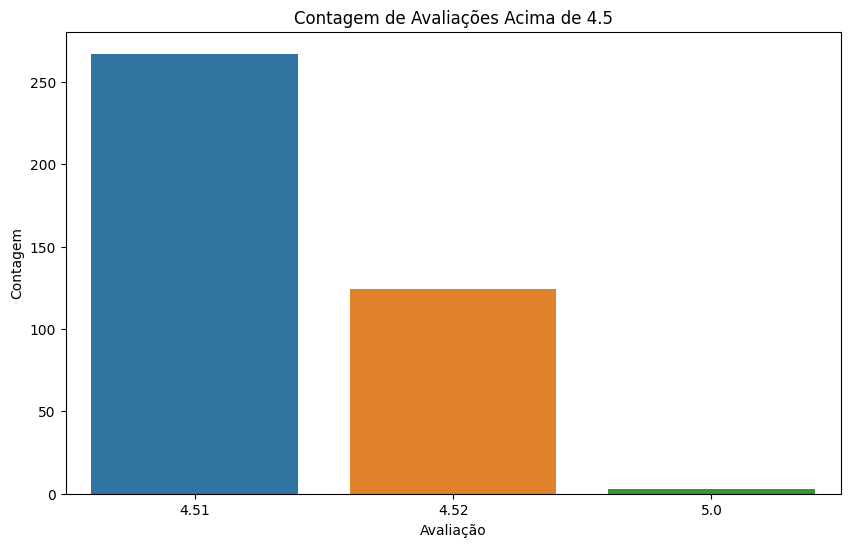

In [16]:
ratings_above_4_5 = dados[dados['rating'] > 4.5]
rating_counts = ratings_above_4_5['rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Contagem de Avaliações Acima de 4.5')
plt.xlabel('Avaliação')
plt.ylabel('Contagem')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

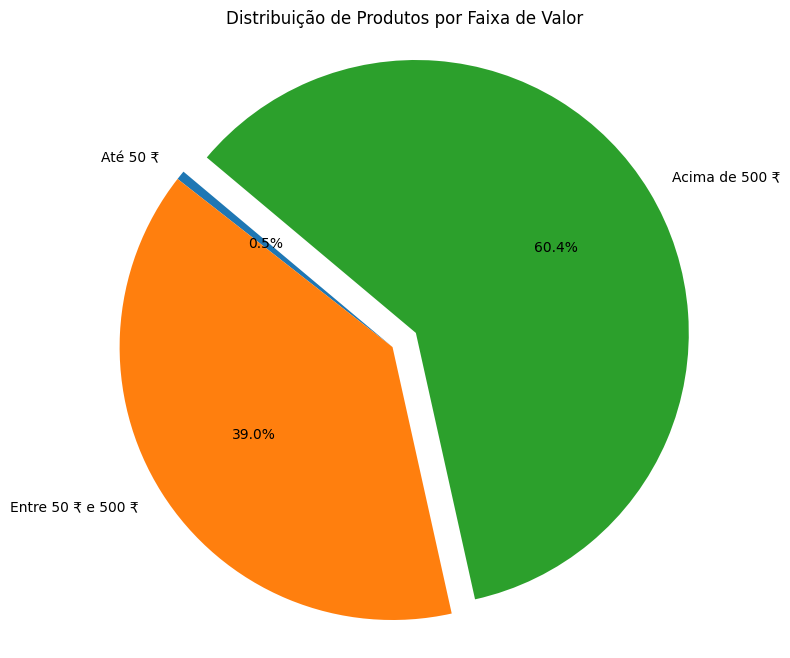

In [17]:
faixa1 = dados[dados['actual_price'] <= 50]
faixa2 = dados[(dados['actual_price'] > 50) & (dados['actual_price'] <= 500)]
faixa3 = dados[dados['actual_price'] > 500]

contagem_faixa1 = len(faixa1)
contagem_faixa2 = len(faixa2)
contagem_faixa3 = len(faixa3)

contagens = [contagem_faixa1, contagem_faixa2, contagem_faixa3]
faixas = ['Até 50 ₹', 'Entre 50 ₹ e 500 ₹', 'Acima de 500 ₹']
explode = (0, 0, 0.1)

plt.figure(figsize=(8, 8))
plt.pie(contagens, labels=faixas, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribuição de Produtos por Faixa de Valor')
plt.axis('equal')
plt.show

## Daqui para frente estou fazendo o desafio da aula.

- Nesse desafio é preciso que eu crie uma nova coluna chamada "actual_price_real", que é o valor da coluna "actual_price" convertido em reais.
- Estou usando o valor de taxa de câmbio usado na aula, "0.05".

In [19]:
taxa_de_cambio = 0.05

In [20]:
dados['actual_price_real'] = dados['actual_price'] * taxa_de_cambio

In [28]:
dados.describe()

actual_price  product_price  actual_price_real       rating  \
count   1465.000000    1465.000000        1465.000000  1465.000000   
mean    3077.617693    5365.248840         153.880885     4.432198   
std     6860.277463   10743.796284         343.013873     0.226138   
min        2.500000      38.000000           0.125000     0.000000   
25%      314.000000     800.000000          15.700000     4.490000   
50%      799.000000    1645.000000          39.950000     4.500000   
75%     1999.000000    4199.000000          99.950000     4.510000   
max    77990.000000  139900.000000        3899.500000     5.000000   

       rating_count  
count  1.465000e+03  
mean   2.166947e+04  
std    9.132905e+04  
min    0.000000e+00  
25%    9.100000e+02  
50%    4.003000e+03  
75%    1.466700e+04  
max    2.051952e+06

- Agora eu devo conectar as duas planilhas "dados" e "avaliações" usando o Python e Pandas.
- Para fazer isso eu usei a função "merge" que o chat GPT me recomendou e escolhi juntas elas usando o parâmetro "how: right". Esse parâmetro é um tipo de mesclagem em que todos os registros do DataFrame à direita (o segundo DataFrame passado para a função) e os registros correspondentes do DataFrame à esquerda são incluídos no resultado.

In [27]:
resultado = pd.merge(dados, avaliacoes, how="right")

In [30]:
resultado.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
2  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
3  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
4  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   

                                            category         category_geral  \
0  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
1  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
2  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
3  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
4  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   

              subcategoria  actual_price  product_price percent  \
0  Accessories&Peripherals         399.0         1099.0  63,69%   
1  Accessories&Peripherals         399.0         1099.0  63,69%   
2  Accessories&Peripherals         399.0         1099.0  63,69%   
3  Accessories&Peripherals         199.0          349.0  42,98%   
4  Accessories&Peripherals         199.0          349.0  42,98%   

   actual_price_real  rating  ...  \
0              19.95     4.5  ...   
1              19.95     4.5  ...   
2              19.95     4.5  ...   
3               9.95     4.0  ...   
4               9.95     4.0  ...   

                                         titulo_ptbr  \
0  Satisfeito, o carregamento é realmente rápido,...   
1  Satisfeito, o carregamento é realmente rápido,...   
2  Satisfeito, o carregamento é realmente rápido,...   
3  Um bom cabo trançado para o seu dispositivo ti...   
4  Um bom cabo trançado para o seu dispositivo ti...   

                                         review_ptbr  \
0  Parece durável. A carga também está boa. Não h...   
1                                                NaN   
2                                                NaN   
3  Eu pedi este cabo para conectar o meu telefone...   
4                                                NaN   

                                              resumo sentimentos  \
0  Cabo de carga durável e de boa qualidade, com ...    positivo   
1                                                NaN         NaN   
2                                                NaN         NaN   
3                                                NaN         NaN   
4                                                NaN         NaN   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
2  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
3  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
4  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
2  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
3  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
4  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
2  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
3  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
4  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  Satisfied,Charging is really fast,Value for mo...   
2  Satisfied,Charging is really fast,Value for mo...   
3  A Good Braided Cable for Your Type C Device,Go...   
4  A Good Braided Cable for Your Type C Device,Go...   

                                      review_content  \
0  Loo

- Por último devo colocar a base já corrigida na biblioteca Pandas Profiling citada no conteúdo extra.
- Eu usei a planilha com os dados brutos. A mais recente tem muitos espaços vazios, por conta do preenchimento usando a extensão GPT que tem limite diário do uso, e ainda não sei mexer bem com isso.

In [38]:
dados_imersao = pd.read_csv('/content/Dados_Imersão [faça uma cópia para editar] - dados.csv')

In [41]:
dados_imersao.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category actual_price  \
0  Computers&Accessories|Accessories&Peripherals|...      ₹399,00   
1  Computers&Accessories|Accessories&Peripherals|...      ₹199,00   
2  Computers&Accessories|Accessories&Peripherals|...      ₹199,00   
3  Computers&Accessories|Accessories&Peripherals|...      ₹329,00   
4  Computers&Accessories|Accessories&Peripherals|...      ₹154,00   

  product_price rating  rating_count  \
0     ₹1.099,00    4,5         24269   
1       ₹349,00      4         43994   
2     ₹1.899,00   4,52          7928   
3       ₹699,00    4,5         94363   
4       ₹399,00    4,5         16905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [32]:
!pip install pandas-profiling
import pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=748e2598e7eae97933bcdad042412be552e593088e906934f30ec974f7bf50a6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


<ipython-input-32-b5dbd5679c69>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [40]:
dados_imersao.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]